In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Pra-processing

### Membaca citra dataset ORL

In [2]:
datasetFaces = []
for i in range(1,41):
    for j in range(1,11):
        citra = cv2.imread('/Users/iamapinn/Developer/UTS Pengolahan CITRA/ORL/'+str(i)+'/ORL_'+str(i)+'_'+str(j)+'.jpg', cv2.COLOR_BGR2GRAY)
        datasetFaces.append(citra)

datasetFaces = np.array(datasetFaces)

print('Jumlah total dataset:', len(datasetFaces))
print('Ukuran dataset:', datasetFaces.shape)

Jumlah total dataset: 400
Ukuran dataset: (400, 112, 92)


### Visualisasi Dataset

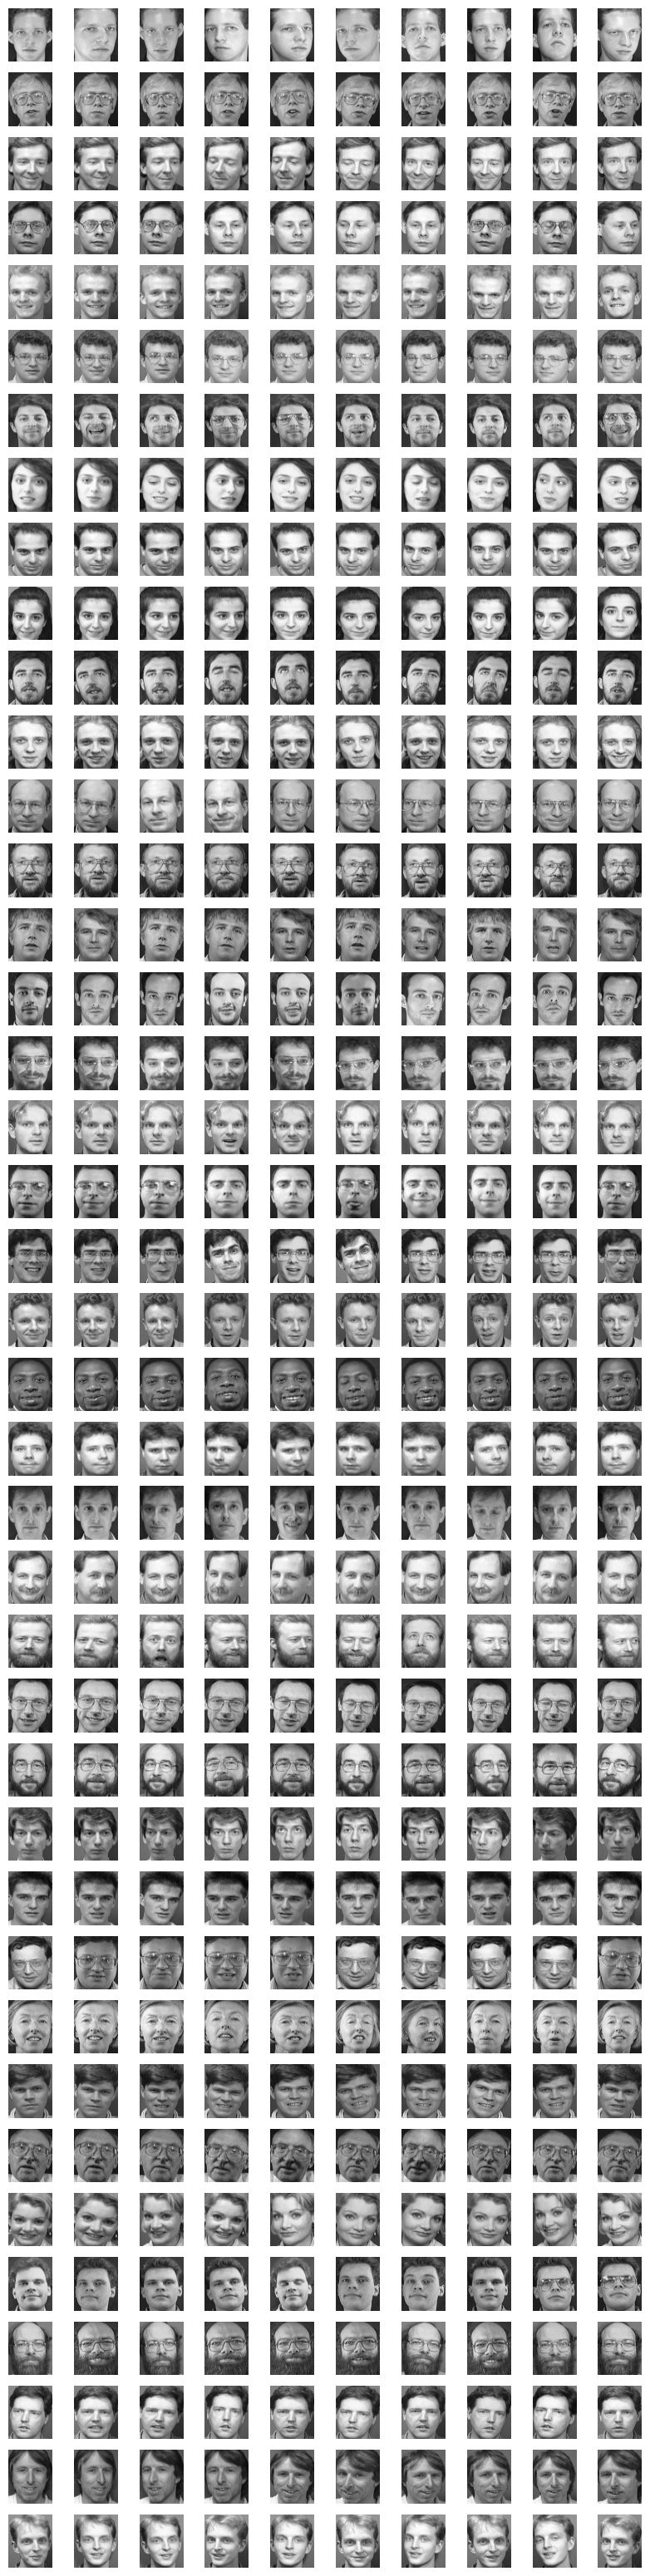

In [3]:
fig, ax = plt.subplots(40, 10, figsize=(10, 40))
for i in range(40):
    for j in range(10):
        ax[i, j].imshow(datasetFaces[i*10+j], cmap='gray')
        ax[i, j].axis('off')
plt.show()

## Processing

### Ekstraksi Fitur menggunakan Principal Component Analysis (PCA) yaitu mereduksi jumlah dimensi yang tinggi ke dimensi yang lebih rendah

#### 1. Pembentukan matriks data citra wajah

<p>Langkah pertama yang dilakukan
adalah membentuk matriks data citra
dengan mengambil data pixel setiap
citranya.</p>

In [4]:
datasetFaces = datasetFaces.reshape(400,10304)
datasetFaces = datasetFaces.astype('float32')
datasetFaces /= 255

print('Ukuran dataset:', datasetFaces.shape)
# pandas pixel
df = pd.DataFrame(datasetFaces)
df

Ukuran dataset: (400, 10304)


0         1         2         3         4         5         6      \
0    0.188235  0.207843  0.168627  0.168627  0.231373  0.200000  0.152941   
1    0.235294  0.247059  0.243137  0.211765  0.192157  0.207843  0.231373   
2    0.156863  0.117647  0.207843  0.188235  0.215686  0.196078  0.250980   
3    0.262745  0.207843  0.152941  0.141176  0.145098  0.137255  0.129412   
4    0.247059  0.294118  0.294118  0.219608  0.164706  0.192157  0.250980   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.490196  0.482353  0.478431  0.482353  0.490196  0.494118  0.490196   
396  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961   
397  0.482353  0.478431  0.474510  0.478431  0.486275  0.490196  0.486275   
398  0.466667  0.466667  0.466667  0.466667  0.466667  0.466667  0.466667   
399  0.478431  0.482353  0.490196  0.494118  0.494118  0.490196  0.482353   

        7         8         9      ...     10294     10295     10296  \
0    0.188235  0.211765  0.188235  ...  0.152941  0.156863  0.164706   
1    0.243137  0.274510  0.282353  ...  0.129412  0.117647  0.121569   
2    0.156863  0.156863  0.121569  ...  0.117647  0.121569  0.129412   
3    0.125490  0.137255  0.172549  ...  0.682353  0.674510  0.650980   
4    0.286275  0.243137  0.196078  ...  0.117647  0.117647  0.121569   
..        ...       ...       ...  ...       ...       ...       ...   
395  0.482353  0.490196  0.490196  ...  0.137255  0.141176  0.149020   
396  0.501961  0.509804  0.509804  ...  0.356863  0.356863  0.356863   
397  0.482353  0.474510  0.474510  ...  0.137255  0.133333  0.133333   
398  0.466667  0.474510  0.466667  ...  0.262745  0.352941  0.349020   
399  0.478431  0.486275  0.486275  ...  0.141176  0.121569  0.117647   

        10297     10298     10299     10300     10301     10302     10303  
0    0.172549  0.180392  0.184314  0.180392  0.180392  0.180392  0.180392  
1    0.121569  0.121569  0.121569  0.129412  0.129412  0.129412  0.133333  
2    0.121569  0.117647  0.125490  0.113725  0.113725  0.109804  0.109804  
3    0.623529  0.631373  0.658824  0.549020  0.145098  0.043137  0.105882  
4    0.125490  0.129412  0.129412  0.145098  0.149020  0.149020  0.152941  
..        ...       ...       ...       ...       ...       ...       ...  
395  0.152941  0.149020  0.145098  0.149020  0.152941  0.156863  0.160784  
396  0.356863  0.356863  0.356863  0.360784  0.360784  0.360784  0.364706  
397  0.137255  0.141176  0.145098  0.156863  0.156863  0.156863  0.152941  
398  0.388235  0.364706  0.376471  0.364706  0.360784  0.356863  0.352941  
399  0.137255  0.133333  0.117647  0.141176  0.141176  0.137255  0.137255  

[400 rows x 10304 columns]

#### 2. Pembagian data train dan test

<p>Langkah kedua yang dilakukan
adalah membagi data citra menjadi data train dan data test.</p>

In [5]:
numOfFeatures = 40  # Jumlah fitur atau kelas yang digunakan
train_size = 0.6  # Split Data dengan pengambilan random

trainData = []
testData = []

for i in range(numOfFeatures):
    # random data
    randomData = datasetFaces[i*10:i*10+10]
    np.random.shuffle(randomData)
    trainData.append(randomData[:int(train_size*10)])
    testData.append(randomData[int(train_size*10):])
    
trainData = np.array(trainData).reshape(int(train_size*numOfFeatures*10), 10304)
testData = np.array(testData).reshape(int((1-train_size)*numOfFeatures*10), 10304)

print('Ukuran data train:', trainData.shape)
print('Ukuran data test:', testData.shape)

Ukuran data train: (240, 10304)
Ukuran data test: (160, 10304)


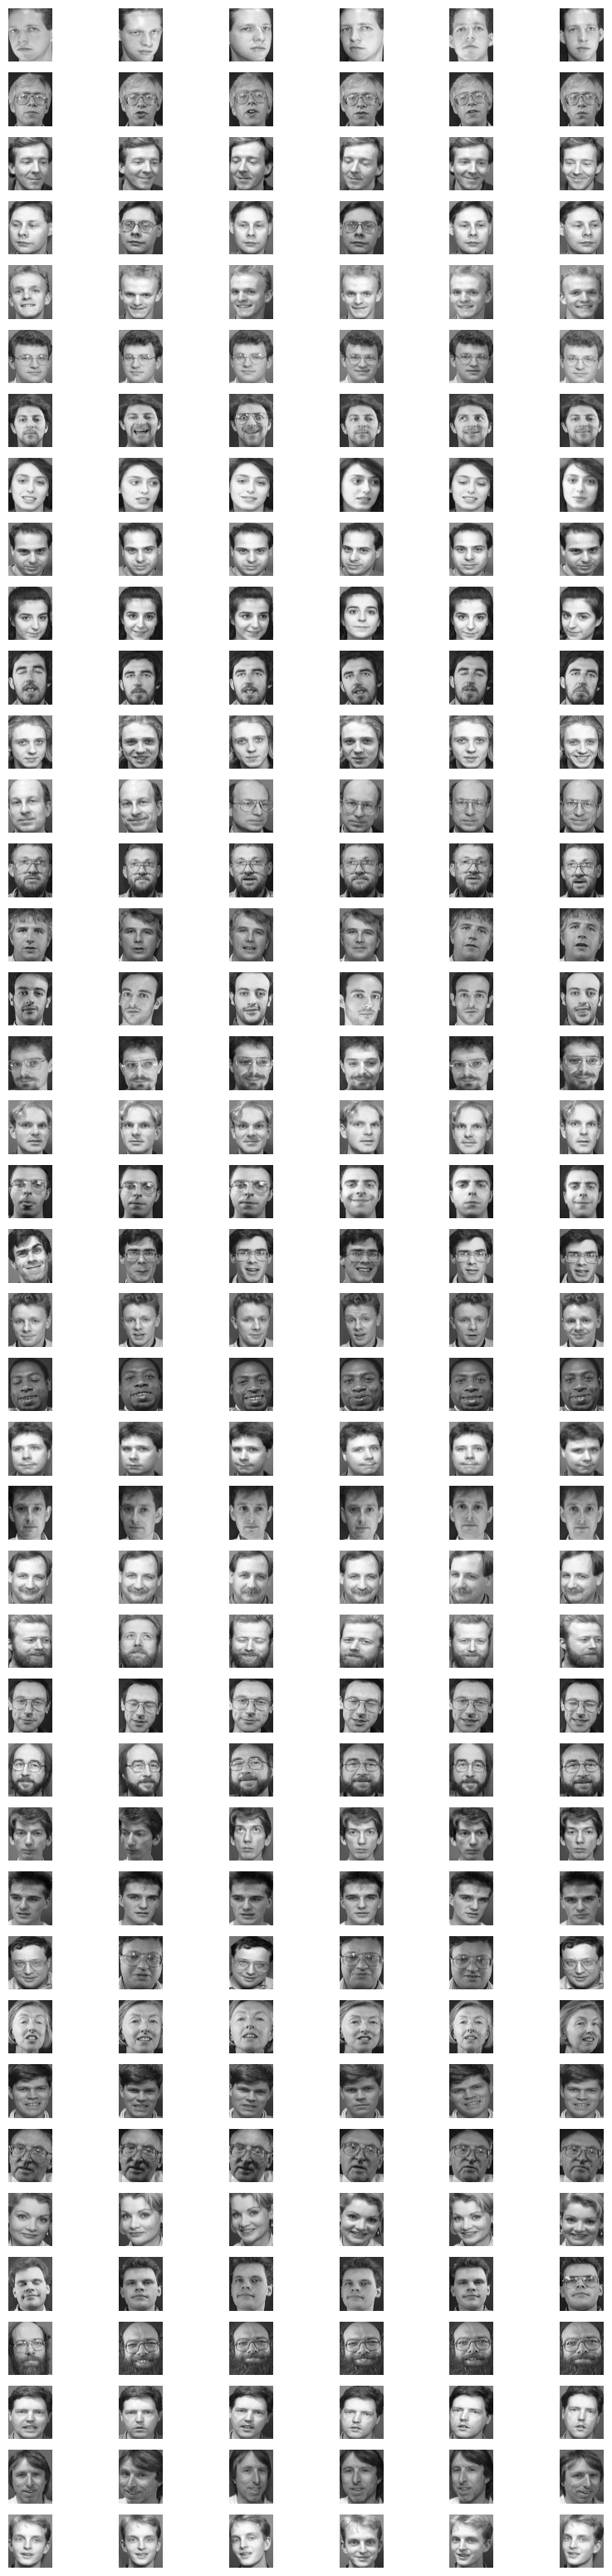

0         1         2         3         4         5         6      \
0    0.152941  0.247059  0.094118  0.250980  0.317647  0.305882  0.270588   
1    0.133333  0.113725  0.117647  0.141176  0.152941  0.149020  0.160784   
2    0.247059  0.294118  0.294118  0.219608  0.164706  0.192157  0.250980   
3    0.262745  0.207843  0.152941  0.141176  0.145098  0.137255  0.129412   
4    0.145098  0.180392  0.192157  0.168627  0.172549  0.203922  0.219608   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961   
236  0.466667  0.466667  0.466667  0.466667  0.466667  0.466667  0.466667   
237  0.490196  0.482353  0.478431  0.482353  0.490196  0.494118  0.490196   
238  0.509804  0.494118  0.474510  0.474510  0.486275  0.494118  0.498039   
239  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961   

        7         8         9      ...     10294     10295     10296  \
0    0.180392  0.223529  0.137255  ...  0.658824  0.650980  0.643137   
1    0.188235  0.207843  0.227451  ...  0.160784  0.156863  0.149020   
2    0.286275  0.243137  0.196078  ...  0.117647  0.117647  0.121569   
3    0.125490  0.137255  0.172549  ...  0.682353  0.674510  0.650980   
4    0.203922  0.243137  0.188235  ...  0.094118  0.137255  0.141176   
..        ...       ...       ...  ...       ...       ...       ...   
235  0.501961  0.517647  0.505882  ...  0.356863  0.352941  0.352941   
236  0.466667  0.474510  0.466667  ...  0.262745  0.352941  0.349020   
237  0.482353  0.490196  0.490196  ...  0.137255  0.141176  0.149020   
238  0.494118  0.482353  0.490196  ...  0.137255  0.141176  0.145098   
239  0.501961  0.509804  0.509804  ...  0.356863  0.356863  0.356863   

        10297     10298     10299     10300     10301     10302     10303  
0    0.631373  0.615686  0.603922  0.607843  0.623529  0.572549  0.682353  
1    0.137255  0.125490  0.113725  0.149020  0.145098  0.141176  0.137255  
2    0.125490  0.129412  0.129412  0.145098  0.149020  0.149020  0.152941  
3    0.623529  0.631373  0.658824  0.549020  0.145098  0.043137  0.105882  
4    0.141176  0.129412  0.137255  0.149020  0.149020  0.149020  0.145098  
..        ...       ...       ...       ...       ...       ...       ...  
235  0.349020  0.349020  0.349020  0.356863  0.352941  0.352941  0.349020  
236  0.388235  0.364706  0.376471  0.364706  0.360784  0.356863  0.352941  
237  0.152941  0.149020  0.145098  0.149020  0.152941  0.156863  0.160784  
238  0.141176  0.141176  0.137255  0.141176  0.141176  0.145098  0.149020  
239  0.356863  0.356863  0.356863  0.360784  0.360784  0.360784  0.364706  

[240 rows x 10304 columns]

In [6]:
# plot trainData
fig, ax = plt.subplots(numOfFeatures, int(10*train_size), figsize=(10, numOfFeatures))
for i in range(numOfFeatures):
    for j in range(int(10*train_size)):
        ax[i, j].imshow(trainData[i*int(10*train_size)+j].reshape(112,92), cmap='gray')
        ax[i, j].axis('off')
plt.show()

df_train = pd.DataFrame(trainData)
df_train

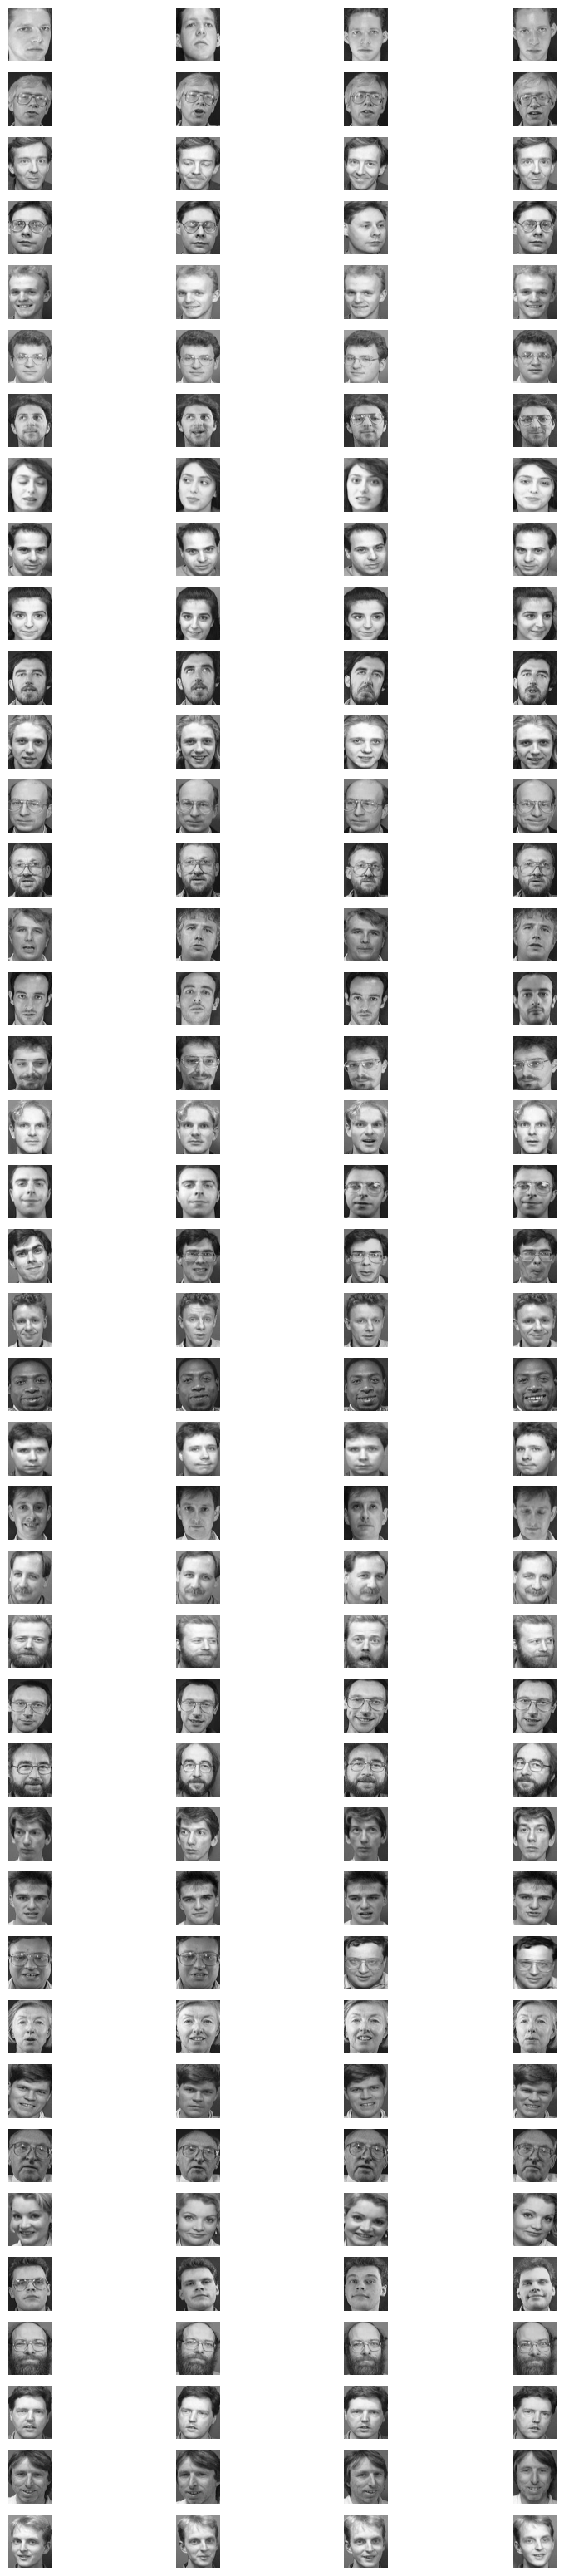

0         1         2         3         4         5         6      \
0    0.235294  0.247059  0.243137  0.211765  0.192157  0.207843  0.231373   
1    0.160784  0.156863  0.160784  0.164706  0.168627  0.168627  0.156863   
2    0.188235  0.207843  0.168627  0.168627  0.231373  0.200000  0.152941   
3    0.156863  0.117647  0.207843  0.188235  0.215686  0.196078  0.250980   
4    0.137255  0.141176  0.145098  0.149020  0.149020  0.149020  0.149020   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.337255  0.337255  0.325490  0.317647  0.329412  0.345098  0.333333   
156  0.478431  0.482353  0.490196  0.494118  0.494118  0.490196  0.482353   
157  0.474510  0.474510  0.474510  0.474510  0.474510  0.474510  0.474510   
158  0.482353  0.478431  0.474510  0.478431  0.486275  0.490196  0.486275   
159  0.498039  0.498039  0.498039  0.498039  0.498039  0.498039  0.498039   

        7         8         9      ...     10294     10295     10296  \
0    0.243137  0.274510  0.282353  ...  0.129412  0.117647  0.121569   
1    0.149020  0.121569  0.149020  ...  0.156863  0.145098  0.141176   
2    0.188235  0.211765  0.188235  ...  0.152941  0.156863  0.164706   
3    0.156863  0.156863  0.121569  ...  0.117647  0.121569  0.129412   
4    0.145098  0.145098  0.145098  ...  0.101961  0.101961  0.101961   
..        ...       ...       ...  ...       ...       ...       ...   
155  0.305882  0.301961  0.258824  ...  0.505882  0.564706  0.549020   
156  0.478431  0.486275  0.486275  ...  0.141176  0.121569  0.117647   
157  0.474510  0.486275  0.482353  ...  0.149020  0.129412  0.149020   
158  0.482353  0.474510  0.474510  ...  0.137255  0.133333  0.133333   
159  0.498039  0.498039  0.498039  ...  0.352941  0.352941  0.352941   

        10297     10298     10299     10300     10301     10302     10303  
0    0.121569  0.121569  0.121569  0.129412  0.129412  0.129412  0.133333  
1    0.152941  0.160784  0.152941  0.176471  0.172549  0.168627  0.168627  
2    0.172549  0.180392  0.184314  0.180392  0.180392  0.180392  0.180392  
3    0.121569  0.117647  0.125490  0.113725  0.113725  0.109804  0.109804  
4    0.101961  0.101961  0.101961  0.113725  0.109804  0.101961  0.098039  
..        ...       ...       ...       ...       ...       ...       ...  
155  0.517647  0.537255  0.564706  0.552941  0.549020  0.541176  0.529412  
156  0.137255  0.133333  0.117647  0.141176  0.141176  0.137255  0.137255  
157  0.168627  0.156863  0.129412  0.156863  0.152941  0.152941  0.149020  
158  0.137255  0.141176  0.145098  0.156863  0.156863  0.156863  0.152941  
159  0.352941  0.352941  0.352941  0.356863  0.356863  0.356863  0.356863  

[160 rows x 10304 columns]

In [7]:
# plot testData
fig, ax = plt.subplots(numOfFeatures, int(10*(1-train_size)), figsize=(10, numOfFeatures))
for i in range(numOfFeatures):
    for j in range(int(10*(1-train_size))):
        ax[i, j].imshow(testData[i*int(10*(1-train_size))+j].reshape(112,92), cmap='gray')
        ax[i, j].axis('off')
plt.show()

df_test = pd.DataFrame(testData)
df_test

#### 3. Pencarian rata-rata seluruh citra train

<p>Setelah terbentuk matriks data citra
wajah, maka proses selanjutnya adalah
mencari nilai mean dari seluruh citra.
Hal ini bertujuan untuk untuk
mengetahui noise yang dapat
mengurangi tingkat keakuratan didalam
perhitungan PCA</p>

In [8]:
mean = np.mean(trainData, axis=0)

print('Ukuran Mean:', mean.shape)

dfMean = pd.DataFrame(mean)
dfMean

Ukuran Mean: (10304,)


0
0      0.332843
1      0.333138
2      0.332615
3      0.333448
4      0.333628
...         ...
10299  0.297516
10300  0.301895
10301  0.300425
10302  0.296242
10303  0.298235

[10304 rows x 1 columns]

#### 4. Penggandaan nilai rata-rata. 

<p>Pengandaan nilai rata-rata dilakukan
untuk menyamakan dimensi nilai ratarata dengan dimensi data citra sampel
sebanyak m, sehingga rata-rata seluruh
citra data sampel memiliki dimensi
(mxn)</p>

In [9]:
meanGanda = np.tile(mean, (trainData.shape[0], 1))

print("Ukuran Mean Ganda:", meanGanda.shape)

dfMeanGanda = pd.DataFrame(meanGanda)
dfMeanGanda

Ukuran Mean Ganda: (240, 10304)


0         1         2         3         4         5        6      \
0    0.332843  0.333138  0.332615  0.333448  0.333628  0.334559  0.33451   
1    0.332843  0.333138  0.332615  0.333448  0.333628  0.334559  0.33451   
2    0.332843  0.333138  0.332615  0.333448  0.333628  0.334559  0.33451   
3    0.332843  0.333138  0.332615  0.333448  0.333628  0.334559  0.33451   
4    0.332843  0.333138  0.332615  0.333448  0.333628  0.334559  0.33451   
..        ...       ...       ...       ...       ...       ...      ...   
235  0.332843  0.333138  0.332615  0.333448  0.333628  0.334559  0.33451   
236  0.332843  0.333138  0.332615  0.333448  0.333628  0.334559  0.33451   
237  0.332843  0.333138  0.332615  0.333448  0.333628  0.334559  0.33451   
238  0.332843  0.333138  0.332615  0.333448  0.333628  0.334559  0.33451   
239  0.332843  0.333138  0.332615  0.333448  0.333628  0.334559  0.33451   

        7         8        9      ...     10294     10295     10296     10297  \
0    0.332647  0.332419  0.33402  ...  0.326242  0.317549  0.311209  0.316863   
1    0.332647  0.332419  0.33402  ...  0.326242  0.317549  0.311209  0.316863   
2    0.332647  0.332419  0.33402  ...  0.326242  0.317549  0.311209  0.316863   
3    0.332647  0.332419  0.33402  ...  0.326242  0.317549  0.311209  0.316863   
4    0.332647  0.332419  0.33402  ...  0.326242  0.317549  0.311209  0.316863   
..        ...       ...      ...  ...       ...       ...       ...       ...   
235  0.332647  0.332419  0.33402  ...  0.326242  0.317549  0.311209  0.316863   
236  0.332647  0.332419  0.33402  ...  0.326242  0.317549  0.311209  0.316863   
237  0.332647  0.332419  0.33402  ...  0.326242  0.317549  0.311209  0.316863   
238  0.332647  0.332419  0.33402  ...  0.326242  0.317549  0.311209  0.316863   
239  0.332647  0.332419  0.33402  ...  0.326242  0.317549  0.311209  0.316863   

        10298     10299     10300     10301     10302     10303  
0    0.307026  0.297516  0.301895  0.300425  0.296242  0.298235  
1    0.307026  0.297516  0.301895  0.300425  0.296242  0.298235  
2    0.307026  0.297516  0.301895  0.300425  0.296242  0.298235  
3    0.307026  0.297516  0.301895  0.300425  0.296242  0.298235  
4    0.307026  0.297516  0.301895  0.300425  0.296242  0.298235  
..        ...       ...       ...       ...       ...       ...  
235  0.307026  0.297516  0.301895  0.300425  0.296242  0.298235  
236  0.307026  0.297516  0.301895  0.300425  0.296242  0.298235  
237  0.307026  0.297516  0.301895  0.300425  0.296242  0.298235  
238  0.307026  0.297516  0.301895  0.300425  0.296242  0.298235  
239  0.307026  0.297516  0.301895  0.300425  0.296242  0.298235  

[240 rows x 10304 columns]

#### 5. Perhitungan nilai rata-rata nol atau Zero Mean

<p>Perhitungan nilai rata-rata nol,
berfungsi untuk menghilangkan noise
yang dapat menganggu keakuratan
pada perhitungan PCA.</p>

In [10]:
ZeroMean = trainData - meanGanda
print("Ukuran Zero Mean:", ZeroMean.shape)

dfZeroMean = pd.DataFrame(ZeroMean)
dfZeroMean

Ukuran Zero Mean: (240, 10304)


0         1         2         3         4         5         6      \
0   -0.179902 -0.086079 -0.238497 -0.082468 -0.015981 -0.028677 -0.063922   
1   -0.199510 -0.219412 -0.214968 -0.192272 -0.180687 -0.185539 -0.173726   
2   -0.085785 -0.039020 -0.038497 -0.113840 -0.168922 -0.142402 -0.083530   
3   -0.070098 -0.125294 -0.179674 -0.192272 -0.188530 -0.197304 -0.205098   
4   -0.187745 -0.152745 -0.140458 -0.164821 -0.161079 -0.130638 -0.114902   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.169117  0.168823  0.169346  0.168513  0.168333  0.167402  0.167451   
236  0.133823  0.133529  0.134052  0.133219  0.133039  0.132108  0.132157   
237  0.157353  0.149215  0.145817  0.148905  0.156568  0.159559  0.155686   
238  0.176961  0.160980  0.141895  0.141062  0.152647  0.159559  0.163529   
239  0.169117  0.168823  0.169346  0.168513  0.168333  0.167402  0.167451   

        7         8         9      ...     10294     10295     10296  \
0   -0.152255 -0.108889 -0.196765  ...  0.332582  0.333431  0.331928   
1   -0.144412 -0.124575 -0.106569  ... -0.165458 -0.160686 -0.162190   
2   -0.046373 -0.089281 -0.137941  ... -0.208595 -0.199902 -0.189641   
3   -0.207157 -0.195164 -0.161471  ...  0.356111  0.356961  0.339771   
4   -0.128726 -0.089281 -0.145785  ... -0.232124 -0.180294 -0.170033   
..        ...       ...       ...  ...       ...       ...       ...   
235  0.169313  0.185229  0.171863  ...  0.030621  0.035392  0.041732   
236  0.134019  0.142091  0.132647  ... -0.063497  0.035392  0.037810   
237  0.149706  0.157778  0.156176  ... -0.188987 -0.176373 -0.162190   
238  0.161470  0.149934  0.156176  ... -0.188987 -0.176373 -0.166111   
239  0.169313  0.177385  0.175784  ...  0.030621  0.039314  0.045654   

        10297     10298     10299     10300     10301     10302     10303  
0    0.314510  0.308660  0.306405  0.305948  0.323105  0.276307  0.384118  
1   -0.179608 -0.181536 -0.183791 -0.152876 -0.155327 -0.155065 -0.160980  
2   -0.191372 -0.177614 -0.168105 -0.156797 -0.151405 -0.147222 -0.145294  
3    0.306667  0.324347  0.361307  0.247124 -0.155327 -0.253105 -0.192353  
4   -0.175686 -0.177614 -0.160261 -0.152876 -0.151405 -0.147222 -0.153137  
..        ...       ...       ...       ...       ...       ...       ...  
235  0.032157  0.041994  0.051503  0.054967  0.052516  0.056699  0.050784  
236  0.071373  0.057680  0.078954  0.062810  0.060360  0.060621  0.054706  
237 -0.163922 -0.158006 -0.152418 -0.152876 -0.147484 -0.139379 -0.137451  
238 -0.175686 -0.165849 -0.160261 -0.160719 -0.159248 -0.151144 -0.149216  
239  0.040000  0.049837  0.059346  0.058889  0.060360  0.064543  0.066471  

[240 rows x 10304 columns]

#### 6. Pembentukan matrik kovarian

<p>Hasil perhitungan nilai rata-rata nol
digunakan untuk mendapatkan nilai
matriks kovarian. Berikut ini adalah
persamaan matriks kovarian:</p>

\begin{equation}
c=\frac{1}{m-1} \phi_{j i} * \phi^T{ }_{j i}
\end{equation}

In [11]:
Cov = np.dot(ZeroMean, ZeroMean.T) / (ZeroMean.shape[0] - 1)

print("Ukuran Covariance Matrix:", Cov.shape)

dfCovMatrix = pd.DataFrame(Cov)
dfCovMatrix

Ukuran Covariance Matrix: (240, 240)


0         1         2         3         4         5         6    \
0    1.511097  0.401009  0.794630  1.273523  0.841222  0.595123  0.124151   
1    0.401009  1.273656  1.023535  0.754486  0.480722  0.867171  0.231744   
2    0.794630  1.023535  1.708701  1.176509  0.792721  1.061887  0.202914   
3    1.273523  0.754486  1.176509  1.832725  0.875441  1.054569  0.048296   
4    0.841222  0.480722  0.792721  0.875441  1.197622  0.734003  0.233053   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.239736  0.237317  0.309797  0.422890  0.098570  0.328022 -0.169080   
236  0.486381  0.198046  0.409533  0.580760  0.235215  0.247772 -0.067612   
237  0.009245  0.115296  0.176539  0.082867  0.037782  0.129239 -0.076334   
238  0.027301 -0.176075 -0.014008 -0.097302 -0.054996 -0.189209 -0.080056   
239  0.364305  0.112153  0.284301  0.356831  0.175402  0.058904 -0.123694   

          7         8         9    ...       230       231       232  \
0    0.149039  0.274282  0.267293  ... -0.729257 -0.735009 -0.739848   
1    0.256097  0.229301  0.240318  ... -0.586499 -0.756594 -0.791214   
2    0.238366  0.298098  0.285917  ... -0.702780 -0.856850 -0.861579   
3    0.168380  0.202509  0.233579  ... -0.727384 -0.810890 -0.831183   
4    0.204258  0.329331  0.265013  ... -0.580717 -0.644159 -0.679882   
..        ...       ...       ...  ...       ...       ...       ...   
235 -0.084039 -0.127865 -0.062422  ... -0.314474 -0.440286 -0.439676   
236 -0.015536 -0.012807 -0.002529  ... -0.400334 -0.384879 -0.363297   
237 -0.045974 -0.060926 -0.008316  ... -0.202716 -0.190838 -0.140251   
238 -0.066588 -0.114269 -0.009534  ... -0.075955  0.015013  0.054148   
239 -0.110235 -0.126222 -0.076660  ... -0.364025 -0.334041 -0.297762   

          233       234       235       236       237       238       239  
0   -0.654164  0.277004  0.239736  0.486381  0.009245  0.027301  0.364305  
1   -0.528482  0.145938  0.237317  0.198046  0.115296 -0.176075  0.112153  
2   -0.706036  0.267159  0.309797  0.409533  0.176539 -0.014008  0.284301  
3   -0.706448  0.343282  0.422890  0.580760  0.082867 -0.097302  0.356831  
4   -0.610213  0.167860  0.098570  0.235215  0.037782 -0.054996  0.175402  
..        ...       ...       ...       ...       ...       ...       ...  
235 -0.207579  0.396884  0.683088  0.288811  0.260081  0.036455  0.261906  
236 -0.274525  0.367973  0.288811  0.881205  0.091171  0.239169  0.456183  
237 -0.056679  0.243551  0.260081  0.091171  0.819879  0.325521  0.170163  
238  0.048088  0.205987  0.036455  0.239169  0.325521  0.933802  0.381247  
239 -0.196891  0.421084  0.261906  0.456183  0.170163  0.381247  0.722007  

[240 rows x 240 columns]

#### 7. Penentuan matriks eigenvalue dan eigenvector

<p>Setelah matriks kovarian didapatkan maka langkah selanjutnya adalah menentukan matriks eigenvalue dan matriks eigenvector. Matriks eigen dapat dicari menggunakan persamaan: </p>

\begin{equation}
\begin{gathered}
C-Z=|C-\lambda I| \\
|C-\lambda I|=0
\end{gathered}
\end{equation}

<p>Dimana C adalah matriks kovarian. Z adalah matriks eigenvalue dengan 𝜆 sebagai scalar pembentuknya dan I sebagai matriks identitas.</p>

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(Cov)

print("Eigenvalues: ", eigenvalues.shape)

dfEigenvalues = pd.DataFrame(eigenvalues)
dfEigenvalues

Eigenvalues:  (240,)


0
0    44.899857
1    33.561188
2    17.420803
3    14.372474
4    11.623425
..         ...
235   0.118144
236   0.106685
237   0.114579
238   0.111506
239   0.104574

[240 rows x 1 columns]

In [13]:
print("Eigenvectors: ", eigenvectors.shape)

dfEigenvectors = pd.DataFrame(eigenvectors)
dfEigenvectors

Eigenvectors:  (240, 240)


0         1         2         3         4         5         6    \
0    0.097423  0.049584  0.019016 -0.106572 -0.143081 -0.032848 -0.113379   
1    0.100011  0.041203 -0.058501 -0.108912  0.035181  0.019532  0.086894   
2    0.139078  0.032459  0.000127 -0.138267 -0.025256 -0.038868  0.055717   
3    0.124571  0.047445  0.021636 -0.183400 -0.019371 -0.064642 -0.128048   
4    0.091852  0.035103 -0.055823 -0.055123 -0.098616 -0.073404 -0.018477   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.038731  0.067336  0.047595 -0.042518  0.084427 -0.001249 -0.047690   
236  0.053312  0.056321  0.058850 -0.005453 -0.017380 -0.065933 -0.160796   
237  0.022179  0.042274  0.097115  0.026844  0.024692 -0.048466  0.084009   
238  0.019380 -0.003632  0.137803  0.089749 -0.042423 -0.056069 -0.016262   
239  0.042287  0.055253  0.073265  0.041766 -0.014627 -0.031363 -0.077886   

          7         8         9    ...       230       231       232  \
0    0.043974  0.068987 -0.058235  ... -0.039346 -0.169019  0.068544   
1   -0.015740 -0.023607 -0.089689  ... -0.049819 -0.007903 -0.017106   
2    0.017233  0.000828 -0.011200  ...  0.044955  0.025010  0.061416   
3    0.018894  0.086938 -0.072178  ... -0.029789  0.041105 -0.046019   
4    0.074838 -0.007050 -0.077118  ...  0.025459 -0.002799 -0.086151   
..        ...       ...       ...  ...       ...       ...       ...   
235  0.055786 -0.015883  0.042045  ... -0.034748  0.128688  0.064189   
236  0.029802  0.043754  0.024373  ...  0.052430  0.013221  0.052335   
237 -0.063285 -0.093947 -0.077354  ...  0.119062 -0.161082  0.046561   
238 -0.021937 -0.096117 -0.041585  ... -0.084393  0.045809 -0.049444   
239  0.048042  0.008043 -0.003581  ... -0.030920 -0.078562  0.076925   

          233       234       235       236       237       238       239  
0   -0.061079  0.081504 -0.049728 -0.007531  0.013053 -0.024291 -0.007003  
1    0.033897 -0.019459  0.082166  0.010080  0.013908 -0.011763 -0.097383  
2   -0.066261 -0.009189  0.109199 -0.028980  0.143396  0.042141 -0.086451  
3    0.004832 -0.052851  0.033765 -0.021322 -0.104484  0.021884 -0.065263  
4   -0.000544  0.068371 -0.029007  0.059864 -0.056202  0.030441 -0.030800  
..        ...       ...       ...       ...       ...       ...       ...  
235 -0.043739 -0.031987 -0.047925 -0.069638 -0.036120  0.074506 -0.064525  
236  0.005142 -0.102282 -0.098212  0.032059  0.082527  0.025130 -0.025154  
237 -0.043981  0.107239 -0.024450 -0.010533  0.014910 -0.062466 -0.027018  
238 -0.083171  0.060998 -0.056619 -0.037006 -0.027873  0.036039 -0.043049  
239  0.092537 -0.017517 -0.017066  0.026719  0.079197  0.011967  0.104139  

[240 rows x 240 columns]

##### Mengurutkan nilai Eigenvalues dan Eigenvectors

In [14]:
idx = eigenvalues.argsort()[::-1]
sorted_eigenvalues = eigenvalues[idx]
sorted_eigenvectors = eigenvectors[:, idx]

#### 8. Penentuan Proyeksi Matrix

<p>Proyeksi matriks digunakan untuk mengurangi dimensi data citra sampel menjadi dimensi yang lebih rendah. Proyeksi matriks dapat dicari menggunakan persamaan:</p>


\begin{equation}
\text { Proyeksi }=\left(\text { Zeromean }^{\top}{ }^* \text { Eigenvector }\right)^{\top}
\end{equation}

In [15]:
Proyeksi = np.dot(ZeroMean.T, sorted_eigenvectors).T

print("Ukuran Proyeksi:", Proyeksi.shape)

dfProyeksi = pd.DataFrame(Proyeksi)
dfProyeksi

Ukuran Proyeksi: (240, 10304)


0         1         2         3         4         5         6      \
0   -0.265403 -0.239408 -0.260423 -0.254459 -0.238280 -0.209845 -0.194685   
1    1.277492  1.289679  1.276585  1.282938  1.293285  1.293736  1.289372   
2    1.236033  1.227206  1.221930  1.228925  1.234334  1.251374  1.267432   
3    0.636685  0.654683  0.680752  0.664508  0.659859  0.652571  0.646259   
4    0.349241  0.324157  0.351807  0.332321  0.324531  0.319166  0.319063   
..        ...       ...       ...       ...       ...       ...       ...   
235 -0.009855 -0.003905  0.010565  0.004516  0.001887  0.009219  0.009706   
236 -0.002764  0.009876  0.019657  0.017292  0.007177  0.012111  0.021188   
237  0.012587 -0.001576 -0.020871 -0.044630 -0.028465 -0.000560  0.001546   
238  0.013285  0.005043 -0.001778 -0.010871 -0.015552 -0.012796 -0.001278   
239  0.000002  0.000002  0.000003  0.000002  0.000002  0.000001  0.000002   

        7             8         9      ...     10294         10295  \
0   -0.201701 -2.175626e-01 -0.179145  ... -0.824412 -7.599213e-01   
1    1.283473  1.280196e+00  1.280211  ... -0.525819 -4.387730e-01   
2    1.267254  1.264568e+00  1.237391  ...  0.288952  5.008768e-01   
3    0.663385  6.528317e-01  0.639603  ... -1.113523 -1.023353e+00   
4    0.349932  3.523107e-01  0.360129  ... -0.407388 -4.132300e-01   
..        ...           ...       ...  ...       ...           ...   
235  0.010589  1.236613e-02  0.026099  ...  0.029210  2.994462e-02   
236  0.028270  3.728591e-02  0.003915  ... -0.018322  1.209789e-02   
237 -0.009677 -9.908521e-03 -0.046754  ...  0.125967  1.825985e-02   
238  0.010656 -8.998675e-03 -0.028606  ...  0.094834  1.159735e-01   
239  0.000001  5.442968e-07  0.000001  ...  0.000003 -8.722352e-08   

            10296     10297     10298     10299         10300     10301  \
0   -7.554178e-01 -0.846653 -0.876415 -0.740715 -6.998601e-01 -0.721237   
1   -4.202996e-01 -0.534750 -0.486543 -0.473058 -7.283008e-01 -0.846177   
2    6.402174e-01  0.659423  0.648119  0.727727  8.296920e-01  0.871187   
3   -9.801633e-01 -1.100163 -1.079026 -0.898356 -8.551309e-01 -0.822756   
4   -4.411406e-01 -0.478029 -0.326774 -0.266118 -2.441712e-01 -0.256690   
..            ...       ...       ...       ...           ...       ...   
235  5.837532e-02  0.049815  0.007297 -0.048798 -4.796982e-02 -0.050490   
236 -3.496273e-05 -0.002730  0.021913  0.039066  2.748410e-02  0.034726   
237 -3.799094e-02 -0.102379 -0.114321  0.008243 -3.512033e-02 -0.023788   
238  1.141238e-02 -0.025919  0.032119  0.074837  9.934328e-02  0.051371   
239  2.860289e-07 -0.000001 -0.000003  0.000002 -3.245053e-08 -0.000002   

        10302     10303  
0   -0.655013 -0.730596  
1   -0.746069 -0.736484  
2    0.878668  0.871459  
3   -0.780783 -0.773417  
4   -0.154614 -0.100488  
..        ...       ...  
235 -0.048573 -0.071428  
236  0.036514 -0.023420  
237 -0.012320 -0.018068  
238  0.022612  0.015022  
239 -0.000002 -0.000002  

[240 rows x 10304 columns]

#### 9. Penentuan Bobot Matrix

<p> 
Bobot matriks digunakan untuk menghitung nilai akurasi dari data test. Bobot matriks dapat dicari menggunakan persamaan:
</p>

\begin{equation}
\text { Bobot }=\text { Training }{ }^* \text { Proyeksi }^T
\end{equation}

In [16]:
bobot = np.dot(trainData, Proyeksi.T)
print("Ukuran Bobot:", bobot.shape)

dfBobot = pd.DataFrame(bobot)
dfBobot

Ukuran Bobot: (240, 240)


0            1           2           3           4           5    \
0    4275.758301  2797.148926  172.367126 -249.375549 -941.184448  185.785828   
1    4303.528809  2729.919189 -150.378189 -257.413361 -445.971954  285.654968   
2    4722.764648  2659.785156   93.721306 -358.248840 -613.867188  174.307526   
3    4567.090820  2779.990967  183.278259 -513.280945 -597.517456  125.165771   
4    4215.979004  2680.990234 -139.228088  -72.646088 -817.661255  108.460083   
..           ...          ...         ...         ...         ...         ...   
235  3645.932129  2939.542725  291.359863  -29.349609 -309.168640  246.033661   
236  3802.405518  2851.188232  338.221802   97.971802 -591.986938  122.703773   
237  3468.306396  2738.513672  497.538635  208.910629 -475.110718  156.008133   
238  3438.278564  2370.292236  666.945557  424.991669 -661.557312  141.510773   
239  3684.095459  2842.621338  398.237152  260.167175 -584.339661  188.617813   

            6           7           8           9    ...       230       231  \
0    -49.040386  245.763229  408.265747   64.135254  ... -1.716590 -2.144119   
1    263.620605  159.276917  301.661865   30.317116  ... -0.875690 -2.284840   
2    214.947479  207.033844  329.793976  114.704773  ... -0.722582 -0.450657   
3    -71.941452  209.438309  428.933167   49.144558  ...  0.004478 -0.741843   
4     99.117294  290.463684  320.724030   43.832664  ... -0.657024 -1.606672   
..          ...         ...         ...         ...  ...       ...       ...   
235   53.510788  262.870911  310.554718  171.950729  ... -0.840307  0.022067   
236 -123.066696  225.237579  379.215149  152.950928  ... -0.768956 -1.215495   
237  259.116089   90.417397  220.677704   43.579563  ... -0.553415 -1.918730   
238  102.575127  150.302353  218.180420   82.036545  ... -0.766364 -2.198030   
239    6.369770  251.654541  338.100189  122.895935  ...  0.319238 -0.872345   

          232       233       234       235       236       237       238  \
0   -0.780368 -0.450585  0.145175 -1.989299  1.001076  0.610754  1.743953   
1   -0.190854 -1.432035  0.403472 -1.361817  1.745573  0.869614  1.698511   
2   -1.196066  0.319136  0.563629 -1.325779  0.808639  1.425584  1.643064   
3   -0.568467 -0.784262  1.294114 -0.804246  0.744170  1.770035  1.911898   
4   -0.286505 -0.710508  0.897485 -1.655660  1.421876  1.016903  1.889085   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.559107  0.466313  0.087762 -0.630096  2.936257  0.278511  1.550948   
236 -0.138811 -0.329157 -0.165594 -0.103182  0.918709  1.168308  1.916454   
237  0.050651 -0.748600  0.191013 -0.460660  0.838662  0.787493  2.209785   
238 -0.581035  1.116805  1.068599 -1.884397  0.599418 -0.479078  1.744096   
239 -0.264120  0.416945 -0.434219 -1.461020  0.264824  1.693206  2.091867   

          239  
0    0.000100  
1    0.000104  
2    0.000093  
3    0.000089  
4    0.000093  
..        ...  
235  0.000102  
236  0.000102  
237  0.000109  
238  0.000087  
239  0.000097  

[240 rows x 240 columns]

# Sisa data dari training diuji secara keseluruhan dengan menampilkan jumlah klasifikasi benar atau salah.

In [17]:
# Calculate the distances between test data and training data
distances = np.linalg.norm(testData[:, np.newaxis] - trainData, axis=2)

# Find the index of the nearest neighbor for each test data
nearest_neighbors = np.argmin(distances, axis=1)

# Calculate the predicted labels based on the nearest neighbors
predicted_labels = np.floor_divide(nearest_neighbors, int(10*train_size))

# Calculate the actual labels for the test data
actual_labels = np.repeat(np.arange(numOfFeatures), int(10*(1-train_size)))

# Calculate the number of correct classifications
correct_classifications = np.sum(predicted_labels == actual_labels)

# Calculate the number of incorrect classifications
incorrect_classifications = np.sum(predicted_labels != actual_labels)

# Display the results
print("Number of correct classifications:", correct_classifications)
print("Number of incorrect classifications:", incorrect_classifications)


Number of correct classifications: 158
Number of incorrect classifications: 2


In [21]:
# Calculate the accuracy
accuracy = correct_classifications / (correct_classifications + incorrect_classifications)

# Display the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9875


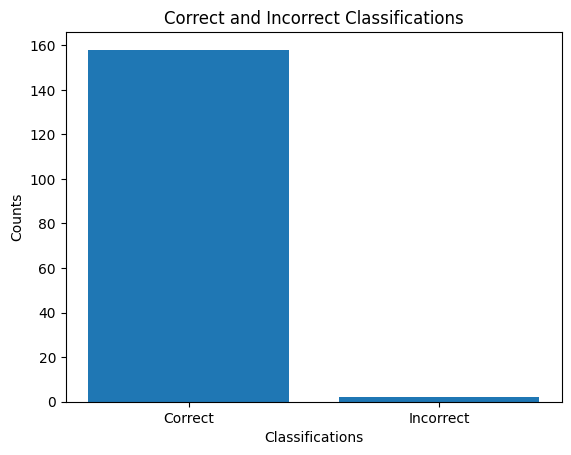

In [18]:
import matplotlib.pyplot as plt

# Define the data
classifications = ['Correct', 'Incorrect']
counts = [correct_classifications, incorrect_classifications]

# Plot the bar chart
plt.bar(classifications, counts)
plt.xlabel('Classifications')
plt.ylabel('Counts')
plt.title('Correct and Incorrect Classifications')
plt.show()
